In [1]:
import mglearn

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
citibike = mglearn.datasets.load_citibike()

In [7]:
citibike

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
                       ..
2015-08-31 09:00:00    16
2015-08-31 12:00:00     8
2015-08-31 15:00:00    17
2015-08-31 18:00:00    22
2015-08-31 21:00:00     7
Freq: 3h, Name: one, Length: 248, dtype: int64

In [19]:
citibike.index.min()
citibike.index.max()

Timestamp('2015-08-31 21:00:00')

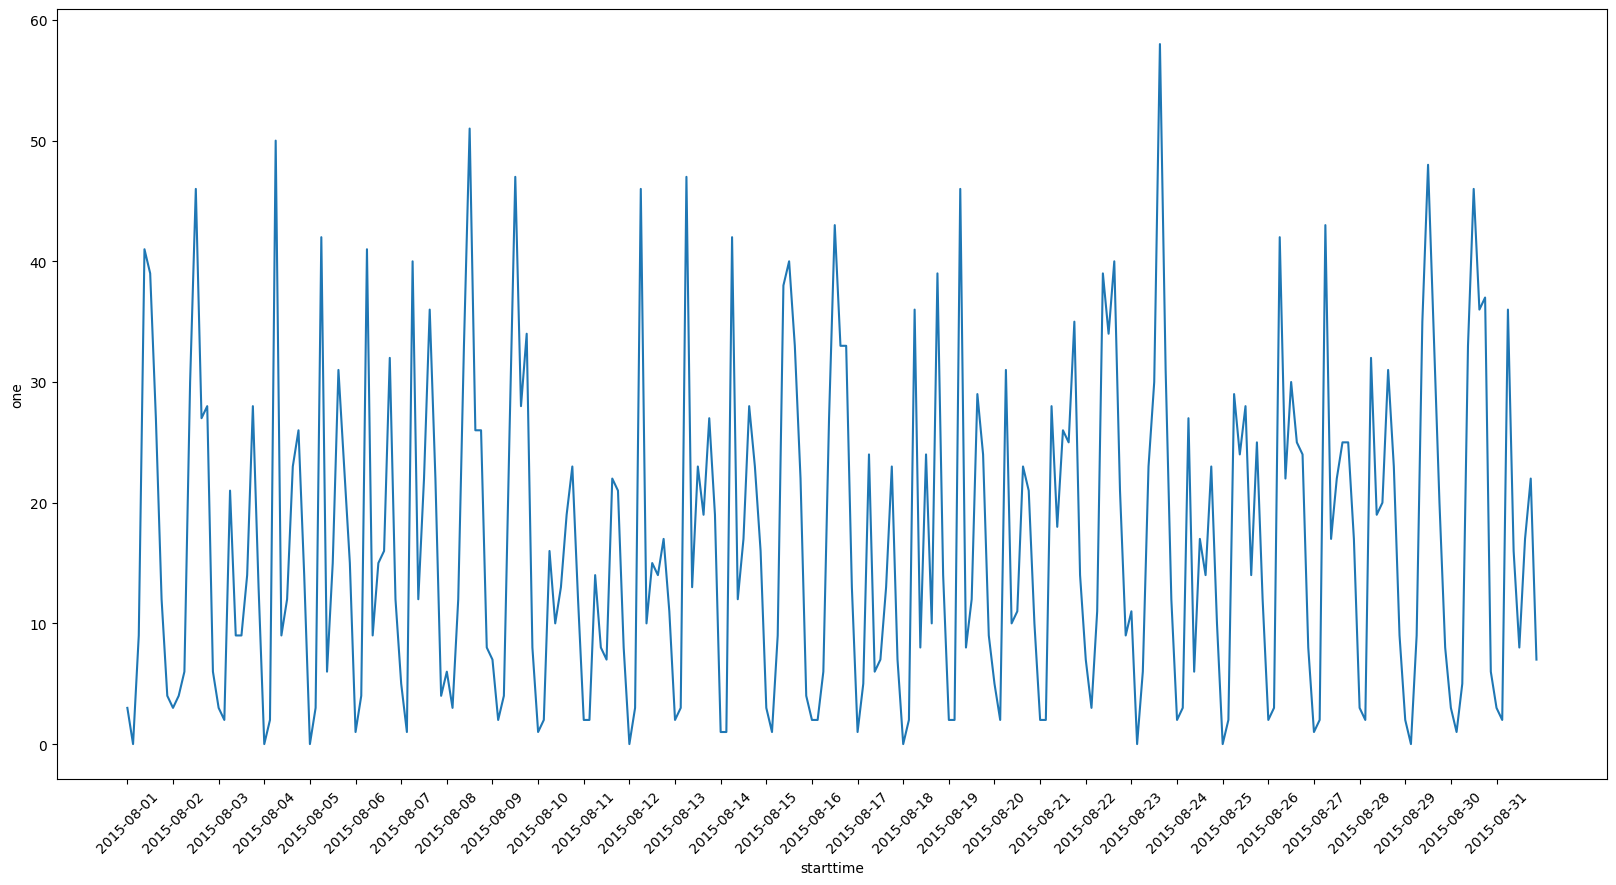

In [22]:
plt.figure(figsize=(20, 10))
sns.lineplot(citibike)
date_range = pd.date_range(citibike.index.min(), citibike.index.max())
plt.xticks(date_range, rotation=45)
plt.show()

In [26]:
y = citibike.to_numpy()
X = citibike.index.astype("int64").to_numpy().reshape(-1, 1) // 10**9

In [30]:
n_train = 184

def eval_on_features(features, target, regressor):
    # 与えられた特徴量を訓練セットとテストセットに分割
    X_train, X_test = features[:n_train], features[n_train:]

    # ターゲットも分割する
    y_train, y_test = target[:n_train], target[n_train:]

    regressor.fit(X_train, y_train)

    print(f"Test-set R^2: {regressor.score(X_test, y_test):.2f}")

    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), date_range.strftime("%a %m-%d"), rotation=90)

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, "-", label="test")
    plt.plot(range(n_train), y_pred_train, "--", label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, "--", label="prediction test")

    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")



Test-set R^2: -0.04


<Figure size 640x480 with 0 Axes>

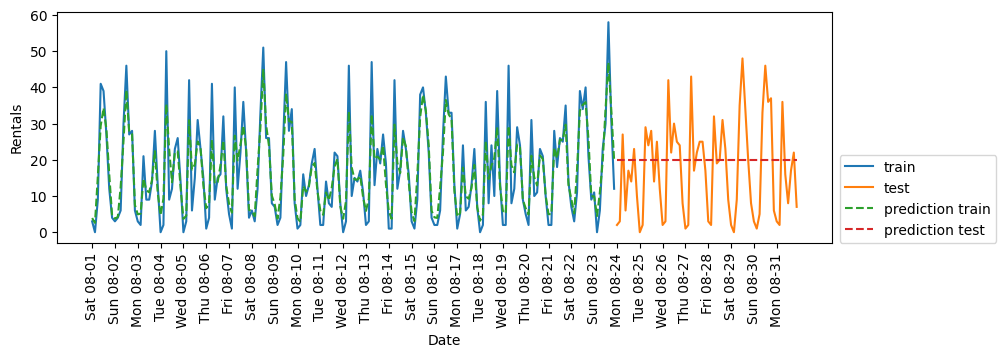

In [31]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)